In [ ]:
import torch
from  torch.distributions.multivariate_normal import MultivariateNormal
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import seaborn as sns
import pandas as pd

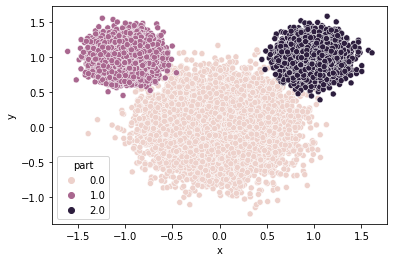

In [ ]:
def get_mouse_data(n):
    head = MultivariateNormal(torch.Tensor([0, 0]), torch.Tensor([[0.11, 0], [0, 0.11]]))
    ear_left = MultivariateNormal(torch.Tensor([-1, 1]), torch.Tensor([[0.02, 0], [0, 0.02]]))
    ear_rigth = MultivariateNormal(torch.Tensor([1, 1]), torch.Tensor([[0.02, 0], [0, 0.02]]))

    data = torch.cat(
        (
            head.sample(torch.Size([1, n])),
            ear_left.sample(torch.Size([1, n])),
            ear_rigth.sample(torch.Size([1, n]))
        ), 0
    )

    return data
    
data = get_mouse_data(10000)

data_np = torch.reshape(data, torch.Size([-1, 2]))

ref_df = pd.DataFrame(
    {
        "x": data_np[:, 0],
        "y": data_np[:, 1],
        "part": torch.cat(
            (
                torch.zeros(10000),
                torch.ones(10000),
                torch.ones(10000)+1
            ), 0
        )
    }
)

sns.scatterplot(data=ref_df, x="x", y="y", hue="part")

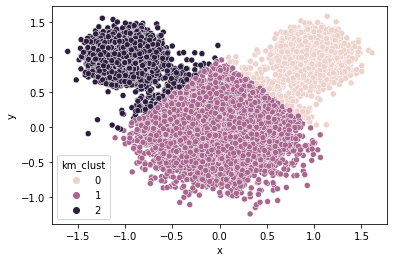

In [ ]:
kmeans_clusters = KMeans(n_clusters=3).fit(ref_df.iloc[:, [0, 1]])

ref_df["km_clust"] = kmeans_clusters.labels_

sns.scatterplot(data=ref_df, x="x", y="y", hue="km_clust")

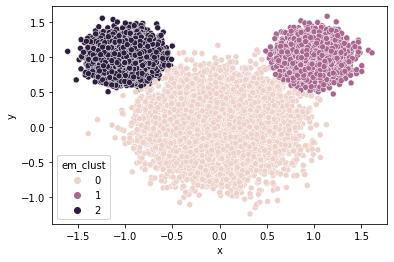

In [ ]:
em_clusters = GaussianMixture(n_components=3).fit(ref_df.iloc[:, [0, 1]])

ref_df["em_clust"] = em_clusters.predict(ref_df.iloc[:, [0, 1]])

sns.scatterplot(data=ref_df, x="x", y="y", hue="em_clust")